# Assignment 1
ISOM 3360, 2020 Spring

In [1]:
import pandas as pd

## Decision Tree

In [2]:
df_ski = pd.read_csv('ski.csv',index_col='ID')

In [3]:
df_ski

,Snow,Weather,Season,Skiing
ID,,,,
1,1,1,0,1
2,1,1,1,1
3,0,0,1,0
4,1,0,1,0
5,1,0,0,1
6,0,0,0,0
7,0,1,1,1
8,1,1,1,1
9,1,0,1,1


In [4]:
X = df_ski[['Snow', 'Weather', 'Season']]
y = df_ski['Skiing']

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
model = DecisionTreeClassifier('entropy')
model.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
from sklearn import tree
import matplotlib.pyplot as plt

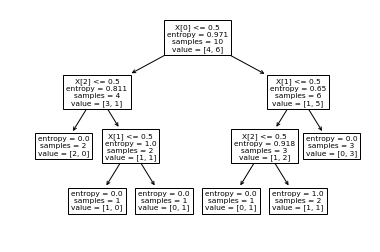

In [8]:
tree.plot_tree(model)
plt.show()

## ROC

In [9]:
df_roc = pd.read_csv('roc.csv')
df_roc['ThresholdLB'] = df_roc['ThresholdUB'].shift(1)
df_roc.fillna(0, inplace=True)

In [10]:
df_roc

,ThresholdUB,TP,FP,FN,TN,TPR,FPR,ThresholdLB
0,0.100,10,10,0,0,1.0,1.0,0.000
1,0.300,10,9,0,1,1.0,0.9,0.100
2,0.330,9,9,1,1,0.9,0.9,0.300
3,0.340,9,8,1,2,0.9,0.8,0.330
4,0.350,8,8,2,2,0.8,0.8,0.340
5,0.360,8,7,2,3,0.8,0.7,0.350
6,0.370,8,6,2,4,0.8,0.6,0.360
7,0.380,8,5,2,5,0.8,0.5,0.370
8,0.390,7,5,3,5,0.7,0.5,0.380
9,0.400,7,4,3,6,0.7,0.4,0.390


In [11]:
cm_rows = ['Actual (1)', 'Actual (0)']
cm_cols = ['Predicted (1)', 'Predicted (0)']

for index, row in df_roc.iterrows():
    df_cm = pd.DataFrame(data=[[ row['TP'], row['FN'] ],
                               [ row['FP'], row['TN'] ]
                              ],
                        index=cm_rows, columns=cm_cols, dtype=int)
    
    print('If', row['ThresholdLB'], '<= t <', row['ThresholdUB'], ',\n')
    
    print(df_cm.to_markdown())
    
    print('\nTrue positive rate (TPR) =', row['TPR'])
    print('False positive rate (FPR) =', row['FPR'], '\n')

If 0.0 <= t < 0.1 ,

|            |   Predicted (1) |   Predicted (0) |
|:-----------|----------------:|----------------:|
| Actual (1) |              10 |               0 |
| Actual (0) |              10 |               0 |

True positive rate (TPR) = 1.0
False positive rate (FPR) = 1.0 

If 0.1 <= t < 0.3 ,

|            |   Predicted (1) |   Predicted (0) |
|:-----------|----------------:|----------------:|
| Actual (1) |              10 |               0 |
| Actual (0) |               9 |               1 |

True positive rate (TPR) = 1.0
False positive rate (FPR) = 0.9 

If 0.3 <= t < 0.33 ,

|            |   Predicted (1) |   Predicted (0) |
|:-----------|----------------:|----------------:|
| Actual (1) |               9 |               1 |
| Actual (0) |               9 |               1 |

True positive rate (TPR) = 0.9
False positive rate (FPR) = 0.9 

If 0.33 <= t < 0.34 ,

|            |   Predicted (1) |   Predicted (0) |
|:-----------|----------------:|----------------:|
|